<a href="https://colab.research.google.com/github/ishitarajan/Python-/blob/main/PRO_115.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import plotly.express as px

df=pd.read_csv("/content/PRO-115.csv")
v=df["Velocity"].tolist()
e=df["Escaped"].tolist()
gr=px.scatter(df,x=v, y=e)
gr.show()

In [4]:
import numpy as np

v_array=np.array(v)
e_array=np.array(e)

m, c = np.polyfit(v_array, e_array, 1)

y=[]
for x in v_array:
    y_value=m*x+c
    y.append(y_value)
l=px.scatter(x=v, y=e)

l.update_layout(shapes=[
  dict(
      type="line",
      y0=min(y), y1=max(y),
      x0=min(v_array), x1=max(e_array)
  )
])
l.show()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



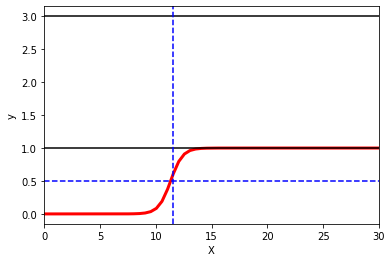

In [10]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression



X = np.reshape(v, (len(v), 1))
Y = np.reshape(e, (len(e), 1))

lr = LogisticRegression()
lr.fit(X, Y)


def model(x):
  return 1 / (1 + np.exp(-x))


X_test = np.linspace(0,100,200) 
melting_chances = model(X_test * lr.coef_ + lr.intercept_).ravel() 


plt.plot(X_test, melting_chances, color='red', linewidth=3)
plt.axhline(y=1, color='k', linestyle='-')
plt.axhline(y=3, color='k', linestyle='-')
plt.axhline(y=0.5, color='b', linestyle='--')

plt.axvline(x=X_test[23], color='b', linestyle='--')
plt.ylabel('y')
plt.xlabel('X')
plt.xlim(0, 30)
plt.show()


